In [1]:
import math
%matplotlib inline
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt

In [107]:
def phix(x):#lether1989
    return 1./( (377.*x/324)+(1+ (314.*(x**2)/847) )**0.5)

def f(t):
    x = np.sqrt(t)
    return (1./(math.pi**0.5) /x - phix(x))

def Pf(t,factor):
    R = 2*0.005
    D = 10.#10.
    kD = 4*3.14*R*D
    ka = factor*kD
    tmol = R*R/D/(1+ka/kD)**2
    Ptotal = ka/(ka+kD)  
    return Ptotal*f(t)


Ptotal 0.0909090909091 total of numerical integration 0.0893636363636
Ptotal 0.909090909091 total of numerical integration 0.893636363636


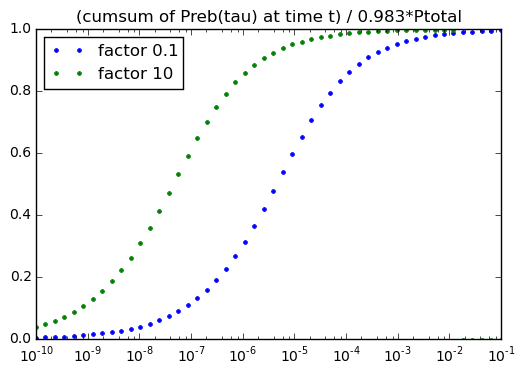

In [152]:
from scipy import integrate
for factor in [0.1,10]:
    R = 2*0.005
    D = 10.#10.
    kD = 4*3.14*R*D
    ka = factor*kD
    tmol = R*R/D/(1+ka/kD)**2
    Ptotal = ka/(ka+kD)  
    print 'Ptotal',Ptotal,'total of numerical integration',0.983*Ptotal
    time =  np.logspace(-10,-1,50)
    Sum = []
    for t in time:
        tau = t/tmol
        ss = integrate.quad(Pf, 0, tau,args=(factor,))   
        Sum.append(ss[0]/0.983/Ptotal)
    plt.semilogx(time,Sum,'.',label='factor '+str(factor))
plt.title('(cumsum of Preb(tau) at time t) / 0.983*Ptotal' )
plt.ylim(0,1)
plt.legend(loc='best')



In [153]:
integrate.quad(f, 0, np.inf) 

(0.9831013842078944, 1.6170753625033285e-10)

tmol 8.26446280992e-06
ka,kD,Ptotal 0.1256 1.256 0.0909090909091


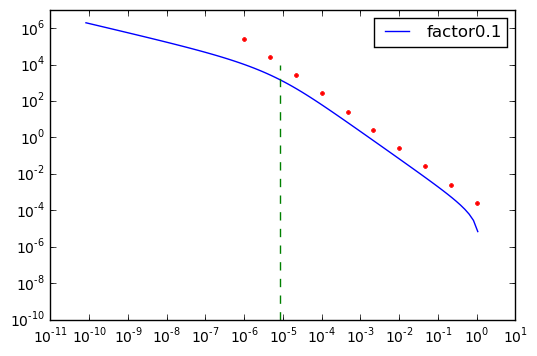

In [175]:
def theory(factor):
    R = 2*0.005
    D = 10.#10.
    kD = 4*3.14*R*D
    ka = factor*kD
    tmol = R*R/D/(1+ka/kD)**2
    Ptotal = ka/(ka+kD)
    print 'tmol',tmol
    print 'ka,kD,Ptotal',ka,kD,Ptotal
    tau = np.logspace(-5,6,100)
    t = tau*tmol
    Nfactor = (ka*(1+ka/kD)*D/kD/R/R)
    plt.loglog(t,f(tau)*Nfactor,'-',label='factor'+str(factor))
    plt.legend()
    plt.plot([tmol]*10, np.logspace(-10,4,10),'--')
    dt = 1e-6
    tt = np.logspace(math.log10(dt),0,10)
    plt.loglog(tt,Nfactor/(tt/tmol)**1.5,'.',label='factor'+str(factor))
    return t,Ptotal*f(tau)

tt, PP = theory(0.1)

tmol 2.5e-06
ka,kD,Ptotal 1.256 1.256 0.5
0.00316227766017 316.227766017
0.00316227766017 316.227766017


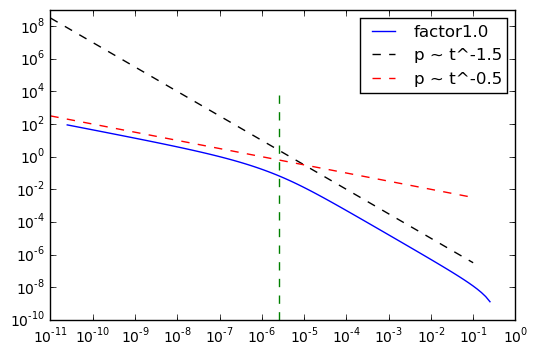

In [59]:
#clr = ['c','r','k','g','b']
#i=0
for fa in [1.]:
    #c = clr[i]
    #i+=1
    tt, PP = theory(fa)
    #plotg(tt,PP,fa)
tt2 = np.logspace(-11,-1,100)
z = lambda x: 1e-8*(x**-1.5) #t^(-0.5)
p = lambda x: 1e-3*(x**-0.5) #t^(-0.5)
plt.plot(tt2,z(tt2),'k--',label='p ~ t^-1.5')    
plt.plot(tt2,p(tt2),'r--',label='p ~ t^-0.5')    
plt.legend()

In [45]:
def plotg(tt,rps,fa):
    rps = np.array(rps)
    bmin = math.log10(min(tt)*0.9)
    bmax = math.log10(max(tt))
    bnum = int((bmax-bmin)*10)
    binlist = np.logspace(bmin,bmax,bnum)
    width = []
    mid = []
    tt = np.array(tt)
    prob = []
    for j in range(len(binlist)-1):
        index = np.where(((tt>binlist[j]) *(tt<=binlist[j+1]))==True)
        if (len(index[0])!=0):
            width = binlist[j+1]-binlist[j]
            mid.append(0.5*(binlist[j+1]+binlist[j]))
            prob.append(sum(rps[index])/width)
    plt.loglog(mid,prob,'.-',label='factor='+str(fa))        
    plt.legend()

In [156]:
for N in range(100):
    N+=1
    x = 1./(float(2*N)/3)**0.5
    print 2./3*scipy.special.erfc(x)

0.0555096777757
0.14711424128
0.211540338575
0.257650820514
0.292385350721
0.319666748125
0.341793840175
0.360194249738
0.375801907767
0.38925494718
0.40100542296
0.411383384968
0.420636027456
0.428952562376
0.436480564012
0.443337028068
0.449616048157
0.45539426554
0.460734815897
0.465690238869
0.470304657408
0.474615433795
0.478654444489
0.482449073221
0.486022993026
0.489396788213
0.492588453576
0.495613798464
0.498486776416
0.501219756031
0.503823745049
0.50630857692
0.508683067035
0.510955144303
0.513131962521
0.515219995123
0.517225116145
0.519152669725
0.521007529999
0.522794152934
0.524516621338
0.52617868409
0.527783790444
0.529335120129
0.530835609825
0.532287976539
0.533694738282
0.535058232423
0.536380632012
0.537663960338
0.538910103943
0.540120824274
0.54129776815
0.542442477178
0.543556396237
0.544640881144
0.545697205588
0.546726567419
0.547730094355
0.548708849172
0.549663834437
0.55059599682
0.551506231042
0.552395383479
0.553264255472
0.554113606361
0.554944156272
0.